■ Tensorflow란?
    
    기계학습과 딥러닝을 위해 구글에서 만든 오픈소스 라이브러리이다.

■ Tensorflow의 특징?
    
    1. 데이터 그래프를 통한 풍부한 표현력
    
    데이터 플로우 그래프 방식으로 텐서보드를 사용하여 그래프를 시각화 할 수 있다.
    
    2. 코드 수정없이 CPU/GPU 모드로 동작 설정가능
    
    한국시간으로 2016.11에 Tensorflow v0.12.0 RCO이 업데이트 되었고
    핵심 변경 사항은 Window에서 GPU버젼의 텐서플로우를 지원한다는 것이다.
    

■ Tensorflow 용어 설명
    
    1. 오퍼레이션 (Operation)
        
        그래프 상의 노드는 오퍼레이션(op)로 불린다.
        오퍼레이션은 하나 이상의 텐서를 받을 수 있다.
        오퍼레이션은 계산을 수행하고, 결과를 하나 이상의 텐서로 반환할 수 있다.
        
        
    2. 텐서 (Tensor)
    
        내부적으로 모든 데이터는 텐서를 통해 표현된다.
        텐서는 일종의 다차원 배열인데, 그래프(신경망) 내의 오퍼레이션간에 텐서가 전달된다.
        
        
    3. 세션 (Session)
    
        그래프를 실행하기 위해서는 세션 객체가 필요하다.
        세션은 오퍼레이션의 실행환경을 캡슐화 한 것이다.
        
    
    4. 변수 (Variable)
    
        변수는 그래프의 실행시, 파라미터를 저장하고 갱신하는데 사용된다.
        
        메모리 상에서 텐서를 저장하는 버퍼 역활을 한다.
        

■ 텐써 플로우를 사용했을때의 이점 ?  
     ↓
 
  다차원 배열의 흐름 

     - 코드가 간결해진다.  
                          모델을 생성하는 부분 
                                  - 오퍼레이션
                                  - 변수 
                          ---------------------
                          모델을 실행하는 부분 
                                  - 세션
                                  

       신경망 구현에 필요한 모든 함수들이 다 내장 되어있다.

     - 속도가 빠르다. 

     - GPU 를 사용할 수 있다. 

■ 텐서플로우 gpu 버전 설치

    1. CUDA Toolkit 9.0 설치
        텐서플로우 GPU 버전을 설치하려면 먼저 CUDA Toolkit 9.0이 필요하다.

        https://developer.nvidia.com/cuda-downloads
        
    2. cuDNN 7.1 설치
        CUDA Toolkit을 설치 완료 했으면, 다음으로 cuDNN 7.1 버전을 설치해주어야만 한다.

        https://developer.nvidia.com/cudnn
        
    3. Tensorflow-gpu 설치
        
        pip install --upgrade tensorflow-gpu

In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2976491750671267647
, name: "/device:GPU:0"
device_type: "GPU"
locality {
  bus_id: 1
}
incarnation: 16715992428707470163
physical_device_desc: "device: 0, name: GeForce 940MX, pci bus id: 0000:01:00.0, compute capability: 5.0"
]


In [13]:
# 텐서플로우 기본 실습1
import tensorflow as tf

sess = tf.Session() # 그래프를 실행할 세션 구성
hello = tf.constant('Hello, Tensorflow!')
print(sess.run(hello))
print(str(sess.run(hello),encoding='utf-8'))

b'Hello, Tensorflow!'
Hello, Tensorflow!


In [14]:
# 텐서플로우 기본 실습2
import tensorflow as tf

x=tf.constant(35, name='x') #x라는 상수값을 만들고 숫자 35를 지정. 
y=tf.Variable(x+5, name='y') #y라는 변수를 만들고 방정식 x+5로 정의함.

model=tf.global_variables_initializer()
#global_variables_initializer() 로 변수를 초기화 하겠다. 
with tf.Session() as sess: #값을 계산하기 위한 세션 생성 
    sess.run(model) #위에서 초기화한 model 을 실행하겠다. 
    print(sess.run(y)) #변수 y를 실행하면서 현재값을 출력하겠다. 

40


In [15]:
# 텐서플로우 기본 실습3: 텐써 플로우는 빌딩 구조와 실행구조(session)이 분리되어 있음

import tensorflow as tf

x2 = tf.linspace(-1.0, 1.0, 10) # -1 ~ 1 사이에 숫자중에 10개를 랜덤으로 출력

print(x2)

Tensor("LinSpace_1:0", shape=(10,), dtype=float32)


In [16]:
# 텐서플로우 기본 실습3-2 모델 실행

g = tf.get_default_graph()
print([op.name for op in g.get_operations()])

sess = tf.Session()

print(sess.run(x2))
sess.close

['Const', 'LinSpace/start', 'LinSpace/stop', 'LinSpace/num', 'LinSpace', 'x', 'add/y', 'add', 'y', 'y/Assign', 'y/read', 'init', 'x_1', 'add_1/y', 'add_1', 'y_1', 'y_1/Assign', 'y_1/read', 'init_1', 'x_2', 'add_2/y', 'add_2', 'y_2', 'y_2/Assign', 'y_2/read', 'init_2', 'Const_1', 'Const_2', 'Const_3', 'Add', 'Const_4', 'Const_5', 'Const_6', 'Add_1', 'Const_7', 'Const_8', 'Const_9', 'Add_2', 'Const_10', 'x_3', 'add_3/y', 'add_3', 'y_3', 'y_3/Assign', 'y_3/read', 'init_3', 'LinSpace_1/start', 'LinSpace_1/stop', 'LinSpace_1/num', 'LinSpace_1']
[-1.         -0.7777778  -0.5555556  -0.3333333  -0.1111111   0.11111116
  0.33333337  0.5555556   0.7777778   1.        ]


<bound method BaseSession.close of <tensorflow.python.client.session.Session object at 0x000001FA3690D940>>

In [17]:
# 텐서플로우 기본 실습4

import tensorflow as tf

hello = tf.constant('Hello, Tensorflow!')
print(hello)

a = tf.constant(10)
b = tf.constant(32)
c = tf.add(a,b)
print(c)

# 방법1
sess = tf.Session()

print(sess.run(hello))
print(sess.run(c))
sess.close

# 방법2
with tf.Session() as sess:
    print(str(sess.run(hello),encoding='utf-8'))
    print(sess.run(c))

Tensor("Const_11:0", shape=(), dtype=string)
Tensor("Add_3:0", shape=(), dtype=int32)
b'Hello, Tensorflow!'
42
Hello, Tensorflow!
42


■ 텐써 플로우 실행구조 

     session 은 fetch 와 feed 2가지 방법으로 처리 

     feed -->  placeholder 에 값을 넣어 실행하는 방법

     fetch --> 연산 결과를 fetch(가져오는) 방법 

In [3]:
import tensorflow as tf

a = tf.placeholder("float")
b = tf.placeholder("float")

y = tf.multiply(a,b)
z = tf.add(y,y)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(sess.run(y, feed_dict={a:3, b:4}))
    print(sess.run(z, feed_dict={a:4, b:5}))

12.0
40.0


In [ ]:
# 텐서플로우로 구구단 2단을 구현하시오
import tensorflow as tf

x = tf.Variable(0, name = 'x')
model = tf.global_variables_initializer()

with tf.Session() as sess:
    for i in range(9):
        sess.run(model)
        x += 2
        print('2 x', i+1, '=',sess.run(x))


In [ ]:
# 구구단 2단부터 9단까지 출력하시오

import  tensorflow  as  tf

x = tf.Variable(0,name='x')
y = tf.Variable(0,name='y')
z = tf.multiply(x,y,name='z')

model = tf.global_variables_initializer()

with  tf.Session()  as  sess:
    sess.run(model)
    for i in range(2,10):
        for j in range(1,10):

            print(i, ' x ', j , ' = ', sess.run(z, feed_dict={x:i,y:j}) )

■ Tensorflow 의 실행에 feed 예시

 Session 은 feed 일 경우는 반드시 feed_dict 으로 처리값을 할당
 해야한다. 

In [ ]:
import  tensorflow  as  tf

a = tf.placeholder("float")
b = tf.placeholder("float")

y = tf.multiply(a,b)
z = tf.add(y,y)

with  tf.Session() as sess:
    sess.run(tf.global_variables_initializer() )
    print ( sess.run( y, feed_dict={a:3, b:3} )  )
    print ( sess.run( z, feed_dict={a:4, b:4} )  )

■ numpy 와 tensorflow의 차이
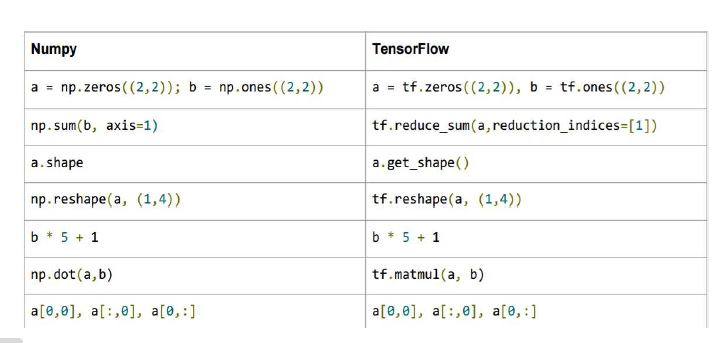

In [ ]:
# 아래의 numpy 문법을 tensorflow 로 변경하시오 !

# 1. numpy  

import  numpy  as  np

a = np.array([ i for i in range(144)])
b = a.reshape(12,12)

print (b.shape) 

# 2. tensorflow 

import  tensorflow  as  tf
import  numpy  as  np

a = np.array([ i for i in range(144)])
b = tf.reshape(a,(12,12) )

with  tf.Session()  as  sess:
    print (sess.run(b))
    print (b.get_shape())

In [2]:
import numpy as np
import tensorflow as tf

x = np.arange(6).reshape(2,3)
print(x)

print(np.sum(x, axis=0))

y=tf.reduce_sum(x,reduction_indices=[0])

with tf.Session() as sess:
    print(sess.run(y))

[[0 1 2]
 [3 4 5]]
[3 5 7]
[3 5 7]


In [3]:
# 숫자 0으로 채워진 2x3 행렬을 만들고 숫자 1로 채워진 2x 3 행렬을 만들어 두행렬의 합을 출력하시오
import tensorflow as tf

a = tf.zeros([2,3])
b = tf.ones([2,3],"float")
result = tf.add(a,b)

with tf.Session() as sess:
    print(sess.run(result))

[[ 1.  1.  1.]
 [ 1.  1.  1.]]


In [ ]:
# 숫자 2로 채워진 2x3 행렬을 x 라는 변수로 만들고
# 숫자 3으로 채워진 3x2 행렬을 y 로 만든후에 x 행렬과 y 행렬의 내적을 구하시오 ! 

import  tensorflow  as  tf

x = tf.placeholder("float",[2,3])
y = tf.placeholder("float",[3,2])
result = tf.matmul(x,y)

sess = tf.Session()

print ( sess.run( x, feed_dict={ x :[[2,2,2],[2,2,2]] } ))
print ( sess.run( y, feed_dict={ y :[[3,3],[3,3],[3,3]] } ))

print ( sess.run( result , feed_dict={ x :[[2,2,2],[2,2,2]] ,
                                       y :[[3,3],[3,3],[3,3]] } ))  

In [ ]:
# 문제12.(텐써플로우의 cast 함수의 이해)
#       아래의 배열의 True 를 1로 변경하고 False 를 0 으로 변경시키시오 ~

import tensorflow as tf

correct_prediction = [ True, False , True  ,True  ,True  ,True  ,True,  True  ,True  ,True  ,True  ,True
  ,True  ,True  ,True, False , True  ,True, False , True  ,True  ,True  ,True  ,True
  ,True  ,True  ,True  ,True  ,True  ,True  ,True  ,True  ,True  ,True  ,True  ,True
  ,True  ,True  ,True  ,True  ,True  ,True  ,True  ,True  ,True  ,True  ,True  ,True,
  True  ,True  ,True  ,True  ,True  ,True  ,True  ,True  ,True  ,True  ,True  ,True
  ,True  ,True  ,True  ,True  ,True  ,True ,False , True  ,True  ,True  ,True  ,True
  ,True  ,True, False , True, False , True  ,True  ,True  ,True  ,True  ,True  ,True
  ,True  ,True  ,True  ,True  ,True  ,True  ,True  ,True  ,True  ,True  ,True  ,True
 ,False , True  ,True  ,True]

sess = tf.Session()
a = tf.cast(correct_prediction ,"float")
print ( sess.run(a) )

In [ ]:
# 문제13. 위의 출력된 결과에서 전체의 갯수중에 1이 몇개나 되는지
#         즉 정확도를 출력하시오!  (전부 더해서 전체 갯수로 나눈다)

import tensorflow as tf

correct_prediction = [ True, False , True  ,True  ,True  ,True  ,True,  True  ,True  ,True  ,True  ,True
  ,True  ,True  ,True, False , True  ,True, False , True  ,True  ,True  ,True  ,True
  ,True  ,True  ,True  ,True  ,True  ,True  ,True  ,True  ,True  ,True  ,True  ,True
  ,True  ,True  ,True  ,True  ,True  ,True  ,True  ,True  ,True  ,True  ,True  ,True,
  True  ,True  ,True  ,True  ,True  ,True  ,True  ,True  ,True  ,True  ,True  ,True
  ,True  ,True  ,True  ,True  ,True  ,True ,False , True  ,True  ,True  ,True  ,True
  ,True  ,True, False , True, False , True  ,True  ,True  ,True  ,True  ,True  ,True
  ,True  ,True  ,True  ,True  ,True  ,True  ,True  ,True  ,True  ,True  ,True  ,True
 ,False , True  ,True  ,True]

sess = tf.Session()
a = tf.cast(correct_prediction ,"float")
b = tf.reduce_mean(a) 
print ( sess.run(b) )

■ mnist 데이터로 단층 신경망 구현하기 

In [ ]:
# 텐써 플로우에 기본적으로 내장되어 있는 mnist 데이터를 가져오시오 !
import  tensorflow  as  tf
from  tensorflow.examples.tutorials.mnist  import  input_data
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)

batch_xs, batch_ys = mnist.train.next_batch(100)

print (batch_xs.shape)
print (batch_ys.shape) 

In [ ]:
# 위의 mnist 데이터중에 train 데이터의 라벨을 one hot encoding 하지 말고
# 숫자로 100개의 라벨을 가져오시오 ~  

import  tensorflow  as  tf
from  tensorflow.examples.tutorials.mnist  import  input_data
mnist = input_data.read_data_sets("MNIST_data/",one_hot=False)

batch_xs, batch_ys = mnist.train.next_batch(100)

print (batch_ys)

In [ ]:
# test  데이터와 test 데이터의 라벨 100개를 가져오는데 shape 만 출력하시오 ! 

from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets('MNIST_data/', one_hot=False)

batch_xs, batch_ys = mnist.train.next_batch(100)
batch_xt, batch_yt = mnist.test.next_batch(100)
print(batch_xt.shape, batch_yt.shape)

In [ ]:
# None 의 의미: " 앞의 행의 갯수가 몇개로 들어오던 관계 없다는 뜻이다 "

import  tensorflow  as  tf

x = tf.placeholder("float",[None,3])
           
sess = tf.Session()
print (sess.run( x, feed_dict={ x : [[2,2,2],[2,2,2]] } ))                  
print (sess.run( x, feed_dict={ x : [[2,2,2],[2,2,2],[2,2,2]] } ))      

In [ ]:
# Mnist 데이터 784(28x28) 개의 맞게 x 변수를 선언하고 
# 배치로 입력될 데이터의 갯수는 None 으로 변수를 만들고
# Mnist 데이터를 x 변수에 100개를 담고 출력해보시오 !

import  tensorflow  as  tf 
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data/', one_hot=False)

x = tf.placeholder("float",[None,784])

batch_xs, batch_ys = mnist.train.next_batch(100)
# 훈련 데이터셋에서 무작위로 100개를 추출 

sess = tf.Session() # 텐써플로우 그래프 연산을 시작하겠금 세션 객체를 생성

print ( sess.run( x, feed_dict = { x : batch_xs } ).shape ) 

In [ ]:
# 2x3 행렬로 -1 에서 1 사이의 난수를 생성하는 변수를 W 로 생성하고 실행하시오 !

import tensorflow as tf

W = tf.Variable(tf.random_uniform([2,3], -1,1) , name="W")
init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init) 
print (sess.run(W)) 

In [ ]:
# 위에서 만든 입력값(100x784) 와 가중치 (785x50) 행렬과 내적을 한 결과를 출력하시오 !

import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/",one_hot=False)

x = tf.placeholder("float",[None,784])
W = tf.Variable(tf.random_uniform([784,50],-1,1), name="W")
y = tf.matmul(x,W)

var = tf.global_variables_initializer()

with tf.Session() as sess:

    sess.run(var)
    batch_xs, batch_ys = mnist.train.next_batch(100)

    print (sess.run(y, feed_dict={x:batch_xs})

In [ ]:
# 1x50 으로 bias 를 생성하는데 변수를 b 로 해서 생성하고 숫자를 다 1로 채우시오 ~

import  tensorflow  as  tf

b = tf.Variable( tf.ones([50]) )

init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)

print(sess.run(b)) 

In [ ]:
# 두 행렬의 내적과 지금 방금 생성한 바이어스의 합의 결과인 y 값을
# 시그모이드 함수에 입력해서 출력한 결과를 출력하시오 !

import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/",one_hot=False)

x = tf.placeholder("float",[None,784])
W = tf.Variable(tf.random_uniform([784,50],-1,1), name="W")
b = tf.Variable(tf.ones([50]))
y = tf.matmul(x,W) + b
y_hat = tf.nn.sigmoid(y) 

var = tf.global_variables_initializer()

with tf.Session() as sess:

    sess.run(var)
    batch_xs, batch_ys = mnist.train.next_batch(100)

    print (sess.run(y_hat, feed_dict={x:batch_xs}))

In [ ]:
# 위의 활성화 함수를 Relu 로 변경해 보시오 !

import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/",one_hot=False)

x = tf.placeholder("float",[None,784])
W = tf.Variable(tf.random_uniform([784,50],-1,1), name="W")
b = tf.Variable(tf.ones([50]))
y = tf.matmul(x,W) + b
y_hat = tf.nn.relu(y)

var = tf.global_variables_initializer()

with tf.Session() as sess:

    sess.run(var)
    batch_xs, batch_ys = mnist.train.next_batch(100)

    print (sess.run(y_hat, feed_dict={x:batch_xs}))

In [ ]:
# 위에서 출력한 y_hat 의 결과를 softmax 함수를 통과 시킨 결과가 어떻게 되는지 출력하시오 !
# ( 10개짜리 확률백터가 출력됨이 예상)

import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/",one_hot=False)

x = tf.placeholder("float",[None,784])
W = tf.Variable(tf.random_uniform([784,10],-1,1), name="W")
b = tf.Variable(tf.ones([10]))
y = tf.matmul(x,W) + b
y_hat = tf.nn.softmax(y) 

var = tf.global_variables_initializer()

with tf.Session() as sess:

    sess.run(var)
    batch_xs, batch_ys = mnist.train.next_batch(100)

    print (sess.run(y_hat, feed_dict={x:batch_xs}))

In [ ]:
# 텐써플로우의 argmax 함수를 이용해서 
# 위에서 출력된 100x10 확률백터들의 최대요소 인덱스 번호를 100개 출력하시오 !

import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/",one_hot=False)

x = tf.placeholder("float",[None,784])
W = tf.Variable(tf.random_uniform([784,10],-1,1), name="W")
b = tf.Variable(tf.ones([10]))
y = tf.matmul(x,W) + b
y_hat = tf.nn.softmax(y) 
y_predict = tf.argmax(y_hat, axis =  1 )

var = tf.global_variables_initializer()

with tf.Session() as sess:

    sess.run(var)
    batch_xs, batch_ys = mnist.train.next_batch(100)

    print (sess.run(y_predict , feed_dict={x:batch_xs}))

In [ ]:
# 의 코드에 라벨을 가져오는 코드를 추가해서 정확도를 출력하시오 ! 
# ( 예상 숫자 100개와 라벨 숫자 100개를 비교해서 정확도 출력) 

# 힌트 :  correct_prediction = tf.equal(y_predict, y_label) 

import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)

x = tf.placeholder("float",[None,784])
W = tf.Variable(tf.random_uniform([784,10],-1,1), name="W")
b = tf.Variable(tf.ones([10]))
y = tf.matmul(x,W) + b
y_hat = tf.nn.softmax( y )
y_predict = tf.argmax(y_hat, axis = 1  )

y_onehot = tf.placeholder("float",[None,10])
y_label = tf.argmax(y_onehot, axis = 1)

correct_prediction = tf.equal(y_predict, y_label)

accuracy = tf.reduce_mean(tf.cast(correct_prediction,"float"))


init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)

batch_xs, batch_ys = mnist.train.next_batch(100)

print(sess.run(y_predict, feed_dict={x:batch_xs}))
print(sess.run(y_label, feed_dict={y_onehot:batch_ys}))

print(sess.run(accuracy, feed_dict={x:batch_xs,y_onehot:batch_ys}))

sess.close()

■ 텐써 플로우로 구현하는 비용 함수 

 1. 최소 제곱 오차 함수 (mean square error)

   loss = tf.square(y_predict, y_label)

 2. 교차 엔트로피 오차 함수 (cross entropy error)

   loss = -tf.reduce_sum(y_onehot * tf.log(y_hat), axis=1)

In [ ]:
# 교차엔트로피 함수를 코드에 추가하고 loss 을 출력하시오 ! 

import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)

# 계층 생성해서 예측값 출력하는 코드 
x = tf.placeholder("float",[None,784])
W = tf.Variable(tf.random_uniform([784,10],-1,1), name="W")
b = tf.Variable(tf.ones([10]))
y = tf.matmul(x,W) + b
y_hat = tf.nn.softmax( y )
y_predict = tf.argmax(y_hat, axis = 1  )

# 라벨을 원핫 인코딩해서 담을 변수를 생성 
y_onehot = tf.placeholder("float",[None,10])

# 라벨을 숫자로 출력
y_label = tf.argmax(y_onehot, axis = 1)

# 손실 함수 
loss = -tf.reduce_sum(y_onehot*tf.log(y_hat), axis=1)

# 정확도를 출력하기 위한 코드 
correct_prediction = tf.equal(y_predict, y_label)
accuracy = tf.reduce_mean(tf.cast(correct_prediction,"float"))

init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)

batch_xs, batch_ys = mnist.train.next_batch(100)

print(sess.run(y_predict, feed_dict={x:batch_xs}))
print(sess.run(y_label, feed_dict={y_onehot:batch_ys}))

print(sess.run(accuracy, feed_dict={x:batch_xs,y_onehot:batch_ys}))
print(sess.run(loss))
sess.close()

■ 경사하강법을 텐써 플로우로 구현하는 방법 

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
 
**SGD :** 
 미니배치만큼 랜덤으로 데이터를 추출해서 확률적으로 경사를 감소하여
 global minima 로 찾아가는 방법 

단점 :  Local minima 에 잘 빠진다. 

**optimizer = tf.train.AdagradOptimizer(learning_rate=0.01)**

러닝 레이트가 학습되면서 자동 조절되는 경사감소법 

**optimizer = tf.train.MomentumOptimizer(learning_rate=0.01)**

관성을 이용해서 local minima 에 안빠지게 하는 경사감소법 

**optimizer = tf.train.AdamOptimizer(learning_rate=0.01)**

Adagrade 의 장점 + Momentum 의 장점 

In [ ]:
# SGD 경사감소법 코드를 적용해서 학습이 되게 구현하시오 !

import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)

# 계층 생성해서 예측값 출력하는 코드 
x = tf.placeholder("float",[None,784])
W = tf.Variable(tf.random_uniform([784,10],-1,1), name="W")
b = tf.Variable(tf.ones([10]))
y = tf.matmul(x,W) + b
y_hat = tf.nn.softmax( y )
y_predict = tf.argmax(y_hat, axis = 1  )

# 라벨을 원핫 인코딩해서 담을 변수를 생성 
y_onehot = tf.placeholder("float",[None,10])

# 라벨을 숫자로 출력
y_label = tf.argmax(y_onehot, axis = 1)

# 손실 함수 
loss = -tf.reduce_sum(y_onehot*tf.log(y_hat), axis=1)

# SGD 경사 감소법 구현 
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)

# 학습 오퍼레이션 정의
train = optimizer.minimize(loss)

# 정확도를 출력하기 위한 코드 
correct_prediction = tf.equal(y_predict, y_label)
accuracy = tf.reduce_mean(tf.cast(correct_prediction,"float"))

init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)

batch_xs, batch_ys = mnist.train.next_batch(100)

sess.run( train, feed_dict={x: batch_xs, y_onehot: batch_ys} ) 
print (sess.run(accuracy, feed_dict={x:batch_xs,y_onehot:batch_ys}))

In [ ]:
# 위의 코드중 아래의 3개의 코드를 for loop 문을 이용해서 반복수행해서 1 에폭 돌게 구성하시오 ! 

import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)

# 계층 생성해서 예측값 출력하는 코드 
x = tf.placeholder("float",[None,784])
W = tf.Variable(tf.random_uniform([784,10],-1,1), name="W")
b = tf.Variable(tf.ones([10]))
y = tf.matmul(x,W) + b
y_hat = tf.nn.softmax( y )
y_predict = tf.argmax(y_hat, axis = 1  )

# 라벨을 원핫 인코딩해서 담을 변수를 생성 
y_onehot = tf.placeholder("float",[None,10])

# 라벨을 숫자로 출력
y_label = tf.argmax(y_onehot, axis = 1)

# 손실 함수 
loss = -tf.reduce_sum(y_onehot*tf.log(y_hat), axis=1)

#SGD 경사 감소법 구현 
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)

#학습 오퍼레이션 정의 
train = optimizer.minimize(loss)

# 정확도를 출력하기 위한 코드 
correct_prediction = tf.equal(y_predict, y_label)
accuracy = tf.reduce_mean(tf.cast(correct_prediction,"float"))

init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)


# print (sess.run(y_predict, feed_dict={x:batch_xs}))
# print (sess.run(y_label, feed_dict={y_onehot:batch_ys}))

for i in range(1,601):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train,feed_dict={x: batch_xs,y_onehot:batch_ys})
    sess.run(accuracy, feed_dict={x:batch_xs,y_onehot:batch_ys})

print(sess.run(accuracy, feed_dict={x:batch_xs,y_onehot:batch_ys}))

■ 텐써플로우 가중치 초기화하는 방법 

 W = tf.Variable(tf.random_uniform([784,10], -1, 1)) # [784,10] 형상을 가진 -1~1 사이의 균등분포 어레이
 
 W = tf.get_variable(name="W", shape=[784, 10], initializer=tf.contrib.layers.xavier_initializer()) # xavier 초기값
 
 W = tf.get_variable(name='W', shape=[784, 10], initializer=tf.contrib.layers.variance_scaling_initializer()) # he 초기값

※ 가중치 초기화 시 주의사항

tf.reset_default_graph()를 넣어 그래프를 갱신해주어야 한다.

In [8]:
# 러닝 레이트를 0.05 로 하고 경사 감소법을 Adam 으로 변경하고 he초기화를 사용해서 학습 시키고 정확도를 확인하시오!
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

tf.reset_default_graph()

mnist = input_data.read_data_sets('MNIST_data/', one_hot = True)

# 계층 생성
x = tf.placeholder("float",[None,784])
W = tf.get_variable(name='W', shape=[784, 10], initializer=tf.contrib.layers.variance_scaling_initializer()) # he 초기값
b = tf.Variable(tf.ones([10]))
y = tf.matmul(x,W) + b
y_hat = tf.nn.softmax(y)
y_predict = tf.argmax(y_hat, axis = 1)

# 라벨을 저장하기 위한 변수 생성
y_onehot = tf.placeholder("float",[None,10])
y_label = tf.argmax(y_onehot, axis = 1)

# 정확도를 출력하기 위한 변수 생성
correct_prediction = tf.equal(y_predict, y_label)
acc = tf.reduce_mean(tf.cast(correct_prediction,"float"))

# 교차 엔트로피 오차 함수
loss = -tf.reduce_sum(y_onehot * tf.log(y_hat), axis = 1)

# SGD 경사 감소법
# optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)

# Adam 경사 감소법
optimizer = tf.train.AdamOptimizer(learning_rate=0.001)

# 학습 오퍼레이션 정의
Train = optimizer.minimize(loss)

# 변수 초기화
init = tf.global_variables_initializer()

with tf.Session() as sess:

    sess.run(init)

    for i in range(10000):

        batch_xs, batch_ys = mnist.train.next_batch(100)

        sess.run(Train, feed_dict={x : batch_xs, y_onehot : batch_ys})

        if i % 600 == 0:
            
            print(i / 600 + 1,'ecpo acc:', sess.run(acc, feed_dict={x:batch_xs, y_onehot: batch_ys}))


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
1.0 ecpo acc: 0.08
2.0 ecpo acc: 0.87
3.0 ecpo acc: 0.94
4.0 ecpo acc: 0.91
5.0 ecpo acc: 0.92
6.0 ecpo acc: 0.94
7.0 ecpo acc: 0.95
8.0 ecpo acc: 0.93
9.0 ecpo acc: 0.96
10.0 ecpo acc: 0.94
11.0 ecpo acc: 0.96
12.0 ecpo acc: 0.94
13.0 ecpo acc: 0.94
14.0 ecpo acc: 0.94
15.0 ecpo acc: 0.95
16.0 ecpo acc: 0.92
17.0 ecpo acc: 0.92


In [13]:
# 위의 코드를 다층으로 변경하시오
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

tf.reset_default_graph()

mnist = input_data.read_data_sets('MNIST_data/', one_hot = True)

# 계층 생성
x = tf.placeholder("float",[None,784])
# 은닉1층
W = tf.get_variable(name='W', shape=[784, 50], initializer=tf.contrib.layers.variance_scaling_initializer()) # he 초기값
b = tf.Variable(tf.ones([50]))
y = tf.matmul(x,W) + b
y_hat = tf.nn.relu(y)

# 2층
W2 = tf.get_variable(name='W2', shape=[50,10], initializer=tf.contrib.layers.variance_scaling_initializer()) # he 초기값
b2 = tf.Variable(tf.ones([10]))
z = tf.matmul(y_hat,W2) + b2
z_hat = tf.nn.softmax(z)
z_predict = tf.argmax(z_hat, axis = 1)

# 라벨을 저장하기 위한 변수 생성
y_onehot = tf.placeholder("float",[None,10])
y_label = tf.argmax(y_onehot, axis = 1)

# 정확도를 출력하기 위한 변수 생성
correct_prediction = tf.equal(z_predict, y_label)
acc = tf.reduce_mean(tf.cast(correct_prediction,"float"))

# 교차 엔트로피 오차 함수
loss = -tf.reduce_sum(y_onehot * tf.log(z_hat), axis = 1)

# SGD 경사 감소법
# optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)

# Adam 경사 감소법
optimizer = tf.train.AdamOptimizer(learning_rate=0.001)

# 학습 오퍼레이션 정의
Train = optimizer.minimize(loss)

# 변수 초기화
init = tf.global_variables_initializer()

with tf.Session() as sess:

    sess.run(init)

    for i in range(10000):

        batch_xs, batch_ys = mnist.train.next_batch(100)

        sess.run(Train, feed_dict={x : batch_xs, y_onehot : batch_ys})

        if i % 600 == 0:
            
            print(i / 600 + 1,'ecpo acc:', sess.run(acc, feed_dict={x:batch_xs, y_onehot: batch_ys}))


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
1.0 ecpo acc: 0.09
2.0 ecpo acc: 0.93
3.0 ecpo acc: 0.92
4.0 ecpo acc: 0.96
5.0 ecpo acc: 0.96
6.0 ecpo acc: 0.99
7.0 ecpo acc: 0.99
8.0 ecpo acc: 0.99
9.0 ecpo acc: 0.97
10.0 ecpo acc: 0.97
11.0 ecpo acc: 0.99
12.0 ecpo acc: 0.98
13.0 ecpo acc: 0.99
14.0 ecpo acc: 1.0
15.0 ecpo acc: 1.0
16.0 ecpo acc: 0.96
17.0 ecpo acc: 0.99


■ 텐서플로우로 배치정규화 구현하기

배치정규화? 신경망 학습시 가중치의 값의 데이터가 골고루 분산될 수 있도록 하는 것을 강제하는 장치

구현코드

batch_z1 = tf.contrib.layers.batch_norm(z1,True)

In [16]:
# 텐서플로우로 배치정규화 구현하기
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

tf.reset_default_graph()

mnist = input_data.read_data_sets('MNIST_data/', one_hot = True)

# 계층 생성
# 입력층(0층)
x = tf.placeholder("float",[None,784])

# 은닉1층
W = tf.get_variable(name='W', shape=[784, 50], initializer=tf.contrib.layers.variance_scaling_initializer()) # he 초기값
b = tf.Variable(tf.ones([50]))
y = tf.matmul(x,W) + b
batch_y = tf.contrib.layers.batch_norm(y,True)
y_hat = tf.nn.relu(batch_y)

# 출력 (2층)
W2 = tf.get_variable(name='W2', shape=[50,10], initializer=tf.contrib.layers.variance_scaling_initializer()) # he 초기값
b2 = tf.Variable(tf.ones([10]))
z = tf.matmul(y_hat,W2) + b2
batch_z = tf.contrib.layers.batch_norm(z,True)
z_hat = tf.nn.softmax(batch_z)
z_predict = tf.argmax(z_hat, axis = 1)

# 라벨을 저장하기 위한 변수 생성
y_onehot = tf.placeholder("float",[None,10])
y_label = tf.argmax(y_onehot, axis = 1)

# 정확도를 출력하기 위한 변수 생성
correct_prediction = tf.equal(z_predict, y_label)
acc = tf.reduce_mean(tf.cast(correct_prediction,"float"))

# 교차 엔트로피 오차 함수
loss = -tf.reduce_sum(y_onehot * tf.log(z_hat), axis = 1)

# SGD 경사 감소법
# optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)

# Adam 경사 감소법
optimizer = tf.train.AdamOptimizer(learning_rate=0.0001)

# 학습 오퍼레이션 정의
Train = optimizer.minimize(loss)

# 변수 초기화
init = tf.global_variables_initializer()

with tf.Session() as sess:

    sess.run(init)

    for i in range(10000):

        batch_xs, batch_ys = mnist.train.next_batch(100)

        sess.run(Train, feed_dict={x : batch_xs, y_onehot : batch_ys})

        if i % 600 == 0:
            
            print(i / 600 + 1,'ecpo acc:', sess.run(acc, feed_dict={x:batch_xs, y_onehot: batch_ys}))


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
1.0 ecpo acc: 0.13
2.0 ecpo acc: 0.84
3.0 ecpo acc: 0.9
4.0 ecpo acc: 0.88
5.0 ecpo acc: 0.91
6.0 ecpo acc: 0.92
7.0 ecpo acc: 0.98
8.0 ecpo acc: 0.9
9.0 ecpo acc: 0.94
10.0 ecpo acc: 0.95
11.0 ecpo acc: 0.92
12.0 ecpo acc: 0.95
13.0 ecpo acc: 0.95
14.0 ecpo acc: 0.97
15.0 ecpo acc: 0.94
16.0 ecpo acc: 0.96
17.0 ecpo acc: 0.96


※ 훈련할때 만들었던 최적의 감마와 베타를 테스트 할때 적용하는 코드 

  
  update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
  with tf.control_dependencies(update_ops):
    train_op = optimizer.minimize(loss)


 훈련할때 학습되면서 배치 정규화의 최적의 감마와 베타를 생성한다

In [18]:
# 최적의 감마와 베타 찾기
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

tf.reset_default_graph()

mnist = input_data.read_data_sets('MNIST_data/', one_hot = True)

# 계층 생성
# 입력층(0층)
x = tf.placeholder("float",[None,784])

# 은닉1층
W = tf.get_variable(name='W', shape=[784, 50], initializer=tf.contrib.layers.variance_scaling_initializer()) # he 초기값
b = tf.Variable(tf.ones([50]))
y = tf.matmul(x,W) + b
batch_y = tf.contrib.layers.batch_norm(y,True)
y_hat = tf.nn.relu(batch_y)

# 출력 (2층)
W2 = tf.get_variable(name='W2', shape=[50,10], initializer=tf.contrib.layers.variance_scaling_initializer()) # he 초기값
b2 = tf.Variable(tf.ones([10]))
z = tf.matmul(y_hat,W2) + b2
batch_z = tf.contrib.layers.batch_norm(z,True)
z_hat = tf.nn.softmax(batch_z)
z_predict = tf.argmax(z_hat, axis = 1)

# 라벨을 저장하기 위한 변수 생성
y_onehot = tf.placeholder("float",[None,10])
y_label = tf.argmax(y_onehot, axis = 1)

# 정확도를 출력하기 위한 변수 생성
correct_prediction = tf.equal(z_predict, y_label)
acc = tf.reduce_mean(tf.cast(correct_prediction,"float"))

# 교차 엔트로피 오차 함수
loss = -tf.reduce_sum(y_onehot * tf.log(z_hat), axis = 1)

# SGD 경사 감소법
# optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)

# Adam 경사 감소법
optimizer = tf.train.AdamOptimizer(learning_rate=0.0001)

# 학습 오퍼레이션 정의
Train = optimizer.minimize(loss)

# 변수 초기화
init = tf.global_variables_initializer()

with tf.Session() as sess:

    sess.run(init)

    for i in range(10000):

        train_xs, train_ys = mnist.train.next_batch(100)
        test_xs, test_ys = mnist.test.next_batch(100)

        sess.run(Train, feed_dict={x : train_xs, y_onehot : train_ys})

        if i % 600 == 0:
            
            print(i / 600 + 1,'ecpo acc:', sess.run(acc, feed_dict={x:train_xs, y_onehot: train_ys}))
            print(i / 600 + 1,'ecpo acc:', sess.run(acc, feed_dict={x:test_xs, y_onehot: test_ys}))


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
1.0 ecpo acc: 0.08
1.0 ecpo acc: 0.11
2.0 ecpo acc: 0.92
2.0 ecpo acc: 0.86
3.0 ecpo acc: 0.9
3.0 ecpo acc: 0.91
4.0 ecpo acc: 0.93
4.0 ecpo acc: 0.95
5.0 ecpo acc: 0.93
5.0 ecpo acc: 0.95
6.0 ecpo acc: 0.95
6.0 ecpo acc: 0.94
7.0 ecpo acc: 0.92
7.0 ecpo acc: 0.91
8.0 ecpo acc: 0.93
8.0 ecpo acc: 0.95
9.0 ecpo acc: 0.95
9.0 ecpo acc: 0.93
10.0 ecpo acc: 0.97
10.0 ecpo acc: 0.92
11.0 ecpo acc: 0.93
11.0 ecpo acc: 0.91
12.0 ecpo acc: 0.96
12.0 ecpo acc: 0.97
13.0 ecpo acc: 0.96
13.0 ecpo acc: 0.96
14.0 ecpo acc: 0.97
14.0 ecpo acc: 0.94
15.0 ecpo acc: 0.95
15.0 ecpo acc: 0.96
16.0 ecpo acc: 0.94
16.0 ecpo acc: 0.92
17.0 ecpo acc: 0.96
17.0 ecpo acc: 0.96


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
1.0 ecpo train acc: 0.12 ecpo test acc: 0.1
2.0 ecpo train acc: 0.93 ecpo test acc: 0.96
3.0 ecpo train acc: 0.93 ecpo test acc: 0.94
4.0 ecpo train acc: 0.94 ecpo test acc: 0.96
5.0 ecpo train acc: 0.94 ecpo test acc: 0.98
6.0 ecpo train acc: 1.0 ecpo test acc: 0.97
7.0 ecpo train acc: 0.98 ecpo test acc: 0.97
8.0 ecpo train acc: 0.98 ecpo test acc: 0.99
9.0 ecpo train acc: 0.99 ecpo test acc: 0.96
10.0 ecpo train acc: 0.96 ecpo test acc: 0.96
11.0 ecpo train acc: 1.0 ecpo test acc: 0.97
12.0 ecpo train acc: 1.0 ecpo test acc: 0.99
13.0 ecpo train acc: 1.0 ecpo test acc: 0.98
14.0 ecpo train acc: 0.99 ecpo test acc: 0.98
15.0 ecpo train acc: 1.0 ecpo test acc: 0.94
16.0 ecpo train acc: 0.98 ecpo test acc: 0.99
17.0 ecpo train acc: 0.99 ecpo test acc: 0.96


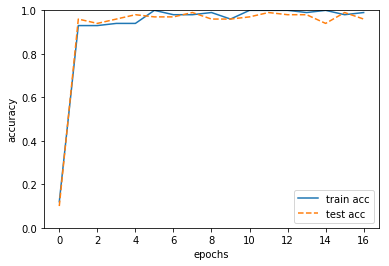

In [44]:
# 시각화하세요
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import numpy as np

tf.reset_default_graph()

mnist = input_data.read_data_sets('MNIST_data/', one_hot = True)

# 계층 생성
x = tf.placeholder("float" ,[None, 784])
W1 = tf.get_variable(name='W1', shape=[784, 50], initializer=tf.contrib.layers.variance_scaling_initializer())
b1 = tf.Variable(tf.ones([50]))
W2 = tf.get_variable(name='W2', shape=[50, 10], initializer=tf.contrib.layers.variance_scaling_initializer())
b2 = tf.Variable(tf.ones([10]))

z1 = tf.matmul(x, W1) + b1
batch_z1 = tf.contrib.layers.batch_norm(z1, True)
r1 = tf.nn.relu(batch_z1)

z2 = tf.matmul(r1, W2) + b2
y_hat = tf.nn.softmax(z2)
y_predict = tf.argmax(y_hat, axis=1)

# 라벨을 저장하기 위한 변수 생성
y_onehot = tf.placeholder("float", [None, 10])
y_label = tf.argmax(y_onehot, axis=1)

# 정확도를 출력하기 위한 변수 생성
correct_prediction = tf.equal(y_predict, y_label)
acc = tf.reduce_mean(tf.cast(correct_prediction, "float"))

# 교차 엔트로피 오차 함수
loss = -tf.reduce_sum(y_onehot * tf.log(y_hat), axis=1)

# SGD 경사 감소법
# optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.05)

# Adam 경사 감소법
optimizer = tf.train.AdamOptimizer(learning_rate=0.001)

# 학습 오퍼레이션 정의
Train = optimizer.minimize(loss)

# 변수 초기화
init = tf.global_variables_initializer()
train_acc_list=[]
test_acc_list =[]

with tf.Session() as sess:
    sess.run(init)

    for i in range(10000):

        train_xs, train_ys = mnist.train.next_batch(100)
        test_xs, test_ys = mnist.test.next_batch(100)

        sess.run(Train, feed_dict={x: train_xs, y_onehot: train_ys})

        if i % 600 == 0:
            train_acc = sess.run(acc, feed_dict={x: train_xs, y_onehot: train_ys})
            test_acc = sess.run(acc, feed_dict={x: test_xs, y_onehot: test_ys})

            print(i / 600 + 1, 'ecpo train acc:', train_acc, 'ecpo test acc:', test_acc)

            train_acc_list.append(train_acc)  # 10000/600 개  16개 # 정확도가 점점 올라감
            test_acc_list.append(test_acc)  # 10000/600 개 16개 # 정확도가 점점 올라감

            print("===============================================================================")

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
1.0 ecpo train acc: 0.29 ecpo test acc: 0.25
2.0 ecpo train acc: 0.94 ecpo test acc: 0.94
3.0 ecpo train acc: 0.95 ecpo test acc: 0.93
4.0 ecpo train acc: 0.94 ecpo test acc: 0.93
5.0 ecpo train acc: 0.94 ecpo test acc: 0.98
6.0 ecpo train acc: 0.97 ecpo test acc: 0.94
7.0 ecpo train acc: 0.91 ecpo test acc: 0.93
8.0 ecpo train acc: 0.96 ecpo test acc: 0.98
9.0 ecpo train acc: 0.97 ecpo test acc: 0.96
10.0 ecpo train acc: 0.98 ecpo test acc: 0.97
11.0 ecpo train acc: 0.98 ecpo test acc: 0.97
12.0 ecpo train acc: 0.98 ecpo test acc: 0.94
13.0 ecpo train acc: 0.97 ecpo test acc: 1.0
14.0 ecpo train acc: 0.96 ecpo test acc: 0.97
15.0 ecpo train acc: 0.96 ecpo test acc: 0.97
16.0 ecpo train acc: 0.98 ecpo test acc: 0.94
17.0 ecpo train acc: 0.97 ecpo test acc: 0.95


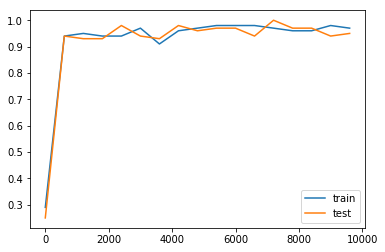

In [51]:
# overfitting발생 -> dropout구현
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import numpy as np

tf.reset_default_graph()
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)

# 계층 생성해서 예측값 출력하는 코드
# 1층
x = tf.placeholder("float",[None,784])
W = tf.get_variable(name='W', shape=[784, 50],
                    initializer=tf.contrib.layers.variance_scaling_initializer()) # he 초기값
# W = tf.Variable(tf.random_uniform([784,10],-1,1), name="W")
b = tf.Variable(tf.ones([50]))
y = tf.matmul(x,W) + b
batch_y1 = tf.contrib.layers.batch_norm(y, True)    # 배치정규화
y_hat1 = tf.nn.relu(batch_y1)

# 2층
keep_prob = tf.placeholder(tf.float32)
dropout = tf.nn.dropout(y_hat1, keep_prob)
W2 = tf.get_variable(name='W2', shape=[50, 10], initializer=tf.contrib.layers.variance_scaling_initializer()) # he 초기값
b2 = tf.Variable(tf.ones([10]))
y2 = tf.matmul(dropout, W2) + b2
y_hat = tf.nn.softmax( y2 )
y_predict = tf.argmax(y_hat, axis = 1)


# 라벨을 원핫 인코딩해서 담을 변수를 생성
y_onehot = tf.placeholder("float",[None,10])

# 라벨을 숫자로 출력
y_label = tf.argmax(y_onehot, axis = 1)

# 손실 함수
loss = -tf.reduce_sum(y_onehot*tf.log(y_hat), axis=1)

# SGD 경사감소법 구현
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)

# 학습 오퍼레이션 정의
train = optimizer.minimize(loss)

# 정확도를 출력하기 위한 코드
correct_prediction = tf.equal(y_predict, y_label)
accuracy = tf.reduce_mean(tf.cast(correct_prediction,"float"))

init = tf.global_variables_initializer()    # 메모리를 한 번 정리.

sess = tf.Session()
sess.run(init)

x_list = []
train_acc_list = []
test_acc_list = []
for i in range(10000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    batch_xt, batch_yt = mnist.test.next_batch(100)
    
    sess.run(train, feed_dict={x: batch_xs, y_onehot: batch_ys, keep_prob:0.8})
    
    if i%600 == 0:
        train_acc = sess.run(accuracy, feed_dict={x: batch_xs, y_onehot: batch_ys, keep_prob:0.8})
        test_acc = sess.run(accuracy, feed_dict={x: batch_xt, y_onehot: batch_yt, keep_prob:1})
        
        print(i / 600 + 1, 'ecpo train acc:', train_acc, 'ecpo test acc:', test_acc)
        
        # 그래프 그리기 위한 밑작업
        x_list.append(i)
        train_acc_list.append(train_acc)  
        test_acc_list.append(test_acc)  
        
plt.plot(x_list, train_acc_list, label='train')
plt.plot(x_list, test_acc_list, label='test')
plt.legend(loc = 'lower right')
plt.show()

※ 배치정규화는 훈련시에만 사용하고 테스트시에서는 사용하지 않는다.
    -> 최적의 감마와 베타 값은 훈련시 만든 것으로 사용

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
1.0 ecpo train acc: 0.03 ecpo test acc: 0.07
2.0 ecpo train acc: 0.81 ecpo test acc: 0.9
3.0 ecpo train acc: 0.9 ecpo test acc: 0.9
4.0 ecpo train acc: 0.9 ecpo test acc: 0.96
5.0 ecpo train acc: 0.97 ecpo test acc: 0.98
6.0 ecpo train acc: 0.98 ecpo test acc: 0.97
7.0 ecpo train acc: 0.97 ecpo test acc: 0.98
8.0 ecpo train acc: 0.96 ecpo test acc: 0.95
9.0 ecpo train acc: 0.98 ecpo test acc: 0.99
10.0 ecpo train acc: 0.95 ecpo test acc: 0.99
11.0 ecpo train acc: 0.96 ecpo test acc: 0.95
12.0 ecpo train acc: 0.98 ecpo test acc: 0.98
13.0 ecpo train acc: 0.97 ecpo test acc: 0.96
14.0 ecpo train acc: 0.99 ecpo test acc: 0.97
15.0 ecpo train acc: 0.97 ecpo test acc: 0.96
16.0 ecpo train acc: 0.99 ecpo test acc: 0.98
17.0 ecpo train acc: 0.98 ecpo test acc: 0.97


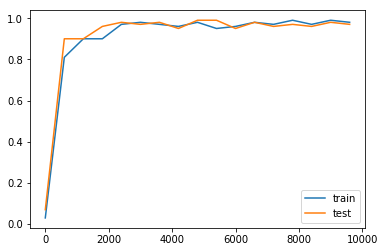

In [58]:

import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import numpy as np

tf.reset_default_graph()
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)

# 계층 생성해서 예측값 출력하는 코드
# 0층
x = tf.placeholder("float",[None,784])
W = tf.get_variable(name='W', shape=[784, 50],
                    initializer=tf.contrib.layers.variance_scaling_initializer()) # he 초기값
b = tf.Variable(tf.ones([50]))

# 1층
y = tf.matmul(x,W) + b
isTrain = tf.placeholder("bool")
batch_y1 = tf.contrib.layers.batch_norm(y, is_training=isTrain)    # 배치정규화
y_hat1 = tf.nn.relu(batch_y1)

# 2층
keep_prob = tf.placeholder(tf.float32)
dropout = tf.nn.dropout(y_hat1, keep_prob)
W2 = tf.get_variable(name='W2', shape=[50, 10], initializer=tf.contrib.layers.variance_scaling_initializer()) # he 초기값
b2 = tf.Variable(tf.ones([10]))
y2 = tf.matmul(dropout, W2) + b2
y_hat = tf.nn.softmax( y2 )
y_predict = tf.argmax(y_hat, axis = 1)


# 라벨을 원핫 인코딩해서 담을 변수를 생성
y_onehot = tf.placeholder("float",[None,10])

# 라벨을 숫자로 출력
y_label = tf.argmax(y_onehot, axis = 1)

# 손실 함수
loss = -tf.reduce_sum(y_onehot*tf.log(y_hat), axis=1)

# # SGD 경사감소법 구현
# optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)

# 학습 오퍼레이션 정의
# train = optimizer.minimize(loss)

# 학습 오퍼레이션 정의
# Adam
update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
with tf.control_dependencies(update_ops):
    # Ensures that we execute the update_ops before performing the train_step
    train = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)

# 정확도를 출력하기 위한 코드
correct_prediction = tf.equal(y_predict, y_label)
accuracy = tf.reduce_mean(tf.cast(correct_prediction,"float"))

init = tf.global_variables_initializer()    # 메모리를 한 번 정리.

sess = tf.Session()
sess.run(init)

x_list = []
train_acc_list = []
test_acc_list = []
for i in range(10000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    batch_xt, batch_yt = mnist.test.next_batch(100)
    
    sess.run(train, feed_dict={x: batch_xs, y_onehot: batch_ys, keep_prob:0.8, isTrain:True})
    
    if i%600 == 0:
        train_acc = sess.run(accuracy, feed_dict={x: batch_xs, y_onehot: batch_ys, keep_prob:1.0, isTrain:False})
        test_acc = sess.run(accuracy, feed_dict={x: batch_xt, y_onehot: batch_yt, keep_prob:1.0,isTrain:False})
        
        print(i / 600 + 1, 'ecpo train acc:', train_acc, 'ecpo test acc:', test_acc)
        
        # 그래프 그리기 위한 밑작업
        x_list.append(i)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        
plt.plot(x_list, train_acc_list, label='train')
plt.plot(x_list, test_acc_list, label='test')
plt.legend(loc = 'lower right')
plt.show()

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
1.0 ecpo train acc: 0.1 ecpo test acc: 0.07
2.0 ecpo train acc: 0.9 ecpo test acc: 0.88
3.0 ecpo train acc: 0.93 ecpo test acc: 0.95
4.0 ecpo train acc: 0.93 ecpo test acc: 0.97
5.0 ecpo train acc: 0.92 ecpo test acc: 0.94
6.0 ecpo train acc: 0.98 ecpo test acc: 0.97
7.0 ecpo train acc: 0.99 ecpo test acc: 0.94
8.0 ecpo train acc: 1.0 ecpo test acc: 0.96
9.0 ecpo train acc: 0.97 ecpo test acc: 0.98
10.0 ecpo train acc: 1.0 ecpo test acc: 0.97
11.0 ecpo train acc: 1.0 ecpo test acc: 0.98
12.0 ecpo train acc: 0.98 ecpo test acc: 0.95
13.0 ecpo train acc: 0.99 ecpo test acc: 0.98
14.0 ecpo train acc: 0.99 ecpo test acc: 0.95
15.0 ecpo train acc: 1.0 ecpo test acc: 1.0
16.0 ecpo train acc: 0.99 ecpo test acc: 0.98
17.0 ecpo train acc: 1.0 ecpo test acc: 0.95


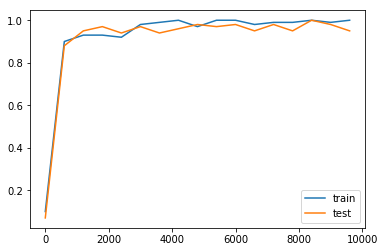

In [60]:
# 3층신경망으로 변경하시오

import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import numpy as np

tf.reset_default_graph()
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)

# 계층 생성
# 0층
x = tf.placeholder("float",[None,784])

# 은닉1층
W = tf.get_variable(name='W', shape=[784, 50],
                    initializer=tf.contrib.layers.variance_scaling_initializer()) # he 초기값
b = tf.Variable(tf.ones([50]))
y = tf.matmul(x,W) + b
isTrain = tf.placeholder("bool")
batch_y1 = tf.contrib.layers.batch_norm(y, is_training=isTrain)    # 배치정규화
y_hat1 = tf.nn.relu(batch_y1)

# 은닉2층
W2 = tf.get_variable(name='W2', shape=[50, 50],
                    initializer=tf.contrib.layers.variance_scaling_initializer()) # he 초기값
b2 = tf.Variable(tf.ones([50]))
y2 = tf.matmul(y_hat1,W2) + b2
batch_y2 = tf.contrib.layers.batch_norm(y2, is_training=isTrain)    # 배치정규화
y_hat2 = tf.nn.relu(batch_y2)

# 2층
keep_prob = tf.placeholder(tf.float32)
dropout = tf.nn.dropout(y_hat2, keep_prob)
W3 = tf.get_variable(name='W3', shape=[50, 10], initializer=tf.contrib.layers.variance_scaling_initializer()) # he 초기값
b3 = tf.Variable(tf.ones([10]))
y3 = tf.matmul(dropout, W3) + b3
y_hat = tf.nn.softmax(y3)

# 예측값
y_predict = tf.argmax(y_hat, axis = 1)


# 라벨을 원핫 인코딩해서 담을 변수를 생성
y_onehot = tf.placeholder("float",[None,10])

# 라벨을 숫자로 출력
y_label = tf.argmax(y_onehot, axis = 1)

# 손실 함수
loss = -tf.reduce_sum(y_onehot*tf.log(y_hat), axis=1)

# # SGD 경사감소법 구현
# optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)

# 학습 오퍼레이션 정의
# train = optimizer.minimize(loss)

# 학습 오퍼레이션 정의
# Adam
update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
with tf.control_dependencies(update_ops):
    # Ensures that we execute the update_ops before performing the train_step
    train = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)

# 정확도를 출력하기 위한 코드
correct_prediction = tf.equal(y_predict, y_label)
accuracy = tf.reduce_mean(tf.cast(correct_prediction,"float"))

init = tf.global_variables_initializer()    # 메모리를 한 번 정리.

sess = tf.Session()
sess.run(init)

x_list = []
train_acc_list = []
test_acc_list = []
for i in range(10000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    batch_xt, batch_yt = mnist.test.next_batch(100)
    
    sess.run(train, feed_dict={x: batch_xs, y_onehot: batch_ys, keep_prob:0.8, isTrain:True})
    
    if i%600 == 0:
        train_acc = sess.run(accuracy, feed_dict={x: batch_xs, y_onehot: batch_ys, keep_prob:1.0, isTrain:False})
        test_acc = sess.run(accuracy, feed_dict={x: batch_xt, y_onehot: batch_yt, keep_prob:1.0,isTrain:False})
        
        print(i / 600 + 1, 'ecpo train acc:', train_acc, 'ecpo test acc:', test_acc)
        
        # 그래프 그리기 위한 밑작업
        x_list.append(i)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        
plt.plot(x_list, train_acc_list, label='train')
plt.plot(x_list, test_acc_list, label='test')
plt.legend(loc = 'lower right')
plt.show()

In [2]:
# 이미지 처리 분야에서 가장 유명한 신경망 모델인 CNN 을 이용하여 더 높은 인식률을 만들어봅니다.
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

#########
# 신경망 모델 구성
######
# 기존 모델에서는 입력 값을 28x28 하나의 차원으로 구성하였으나,
# CNN 모델을 사용하기 위해 2차원 평면과 특성치의 형태를 갖는 구조로 만듭니다.
X = tf.placeholder(tf.float32, [None, 28, 28, 1])
Y = tf.placeholder(tf.float32, [None, 10])
keep_prob = tf.placeholder(tf.float32)

# 각각의 변수와 레이어는 다음과 같은 형태로 구성됩니다.
# W1 [3 3 1 32] -> [3 3]: 커널 크기, 1: 입력값 X 의 특성수, 32: 필터 갯수
# L1 Conv shape=(?, 28, 28, 32)
#    Pool     ->(?, 14, 14, 32)
W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))
# tf.nn.conv2d 를 이용해 한칸씩 움직이는 컨볼루션 레이어를 쉽게 만들 수 있습니다.
# padding='SAME' 은 커널 슬라이딩시 최외곽에서 한칸 밖으로 더 움직이는 옵션
L1 = tf.nn.conv2d(X, W1, strides=[1, 1, 1, 1], padding='SAME')
L1 = tf.nn.relu(L1)
# Pooling 역시 tf.nn.max_pool 을 이용하여 쉽게 구성할 수 있습니다.
L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
# L1 = tf.nn.dropout(L1, keep_prob)

# L2 Conv shape=(?, 14, 14, 64)
#    Pool     ->(?, 7, 7, 64)
# W2 의 [3, 3, 32, 64] 에서 32 는 L1 에서 출력된 W1 의 마지막 차원, 필터의 크기 입니다.
W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01))
L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME')
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
L2 = tf.nn.dropout(L2, keep_prob)

# FC 레이어: 입력값 7x7x64 -> 출력값 256
# Full connect를 위해 직전의 Pool 사이즈인 (?, 7, 7, 64) 를 참고하여 차원을 줄여줍니다.
#    Reshape  ->(?, 256)
W3 = tf.Variable(tf.random_normal([7 * 7 * 64, 256], stddev=0.01))
L3 = tf.reshape(L2, [-1, 7 * 7 * 64])
L3 = tf.matmul(L3, W3)
L3 = tf.nn.relu(L3)
L3 = tf.nn.dropout(L3, keep_prob)

# 최종 출력값 L3 에서의 출력 256개를 입력값으로 받아서 0~9 레이블인 10개의 출력값을 만듭니다.
W4 = tf.Variable(tf.random_normal([256, 10], stddev=0.01))
model = tf.matmul(L3, W4)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=model, labels=Y))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)
# 최적화 함수를 RMSPropOptimizer 로 바꿔서 결과를 확인해봅시다.
# optimizer = tf.train.RMSPropOptimizer(0.001, 0.9).minimize(cost)

#########
# 신경망 모델 학습
######
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

for epoch in range(15):
    total_cost = 0

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        # 이미지 데이터를 CNN 모델을 위한 자료형태인 [28 28 1] 의 형태로 재구성합니다.
        batch_xs = batch_xs.reshape(-1, 28, 28, 1)

        _, cost_val = sess.run([optimizer, cost],
                               feed_dict={X: batch_xs,
                                          Y: batch_ys,
                                          keep_prob: 0.7})
        total_cost += cost_val

    print('Epoch:', '%04d' % (epoch + 1),
          'Avg. cost =', '{:.3f}'.format(total_cost / total_batch))

print('최적화 완료!')

#########
# 결과 확인
######
is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('정확도:', sess.run(accuracy,
                        feed_dict={X: mnist.test.images.reshape(-1, 28, 28, 1),
                                   Y: mnist.test.labels,
                                   keep_prob: 1}))

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Epoch: 0001 Avg. cost = 0.369
Epoch: 0002 Avg. cost = 0.131
Epoch: 0003 Avg. cost = 0.093
Epoch: 0004 Avg. cost = 0.074
Epoch: 0005 Avg. cost = 0.060
Epoch: 0006 Avg. cost = 0.052
Epoch: 0007 Avg. cost = 0.045
Epoch: 0008 Avg. cost = 0.038
Epoch: 0009 Avg. cost = 0.036
Epoch: 0010 Avg. cost = 0.031
Epoch: 0011 Avg. cost = 0.029
Epoch: 0012 Avg. cost = 0.026
Epoch: 0013 Avg. cost = 0.024
Epoch: 0014 Avg. cost = 0.022
Epoch: 0015 Avg. cost = 0.021
최적화 완료!


ResourceExhaustedError: OOM when allocating tensor with shape[10000,32,28,28] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: Conv2D_2 = Conv2D[T=DT_FLOAT, data_format="NCHW", dilations=[1, 1, 1, 1], padding="SAME", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true, _device="/job:localhost/replica:0/task:0/device:GPU:0"](Conv2D_2-0-TransposeNHWCToNCHW-LayoutOptimizer, Variable_4/read)]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.

	 [[Node: Mean_3/_21 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_66_Mean_3", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.


Caused by op 'Conv2D_2', defined at:
  File "C:\Users\nsa18\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\nsa18\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\nsa18\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\nsa18\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\nsa18\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 497, in start
    self.io_loop.start()
  File "C:\Users\nsa18\Anaconda3\lib\site-packages\zmq\eventloop\ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "C:\Users\nsa18\Anaconda3\lib\site-packages\tornado\ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "C:\Users\nsa18\Anaconda3\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\nsa18\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "C:\Users\nsa18\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "C:\Users\nsa18\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "C:\Users\nsa18\Anaconda3\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\nsa18\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "C:\Users\nsa18\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "C:\Users\nsa18\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "C:\Users\nsa18\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\nsa18\Anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\nsa18\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2698, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\nsa18\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2802, in run_ast_nodes
    if self.run_code(code, result):
  File "C:\Users\nsa18\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-2-05b8a01a0a9a>", line 22, in <module>
    L1 = tf.nn.conv2d(X, W1, strides=[1, 1, 1, 1], padding='SAME')
  File "C:\Users\nsa18\Anaconda3\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 1042, in conv2d
    data_format=data_format, dilations=dilations, name=name)
  File "C:\Users\nsa18\Anaconda3\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "C:\Users\nsa18\Anaconda3\lib\site-packages\tensorflow\python\util\deprecation.py", line 454, in new_func
    return func(*args, **kwargs)
  File "C:\Users\nsa18\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 3155, in create_op
    op_def=op_def)
  File "C:\Users\nsa18\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 1717, in __init__
    self._traceback = tf_stack.extract_stack()

ResourceExhaustedError (see above for traceback): OOM when allocating tensor with shape[10000,32,28,28] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: Conv2D_2 = Conv2D[T=DT_FLOAT, data_format="NCHW", dilations=[1, 1, 1, 1], padding="SAME", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true, _device="/job:localhost/replica:0/task:0/device:GPU:0"](Conv2D_2-0-TransposeNHWCToNCHW-LayoutOptimizer, Variable_4/read)]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.

	 [[Node: Mean_3/_21 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_66_Mean_3", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.



In [ ]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import numpy as np

mnist = input_data.read_data_sets('MNIST_data/', one_hot = True)
tf.reset_default_graph()

x = tf.placeholder(tf.float32, [None, 28, 28, 1])
y = tf.placeholder(tf.float32, [None, 10])
keep_prob = tf.placeholder(tf.float32)

W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))
L1 = tf.nn.conv2d(x, W1, strides=[1, 1, 1, 1], padding='SAME')
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01))
L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME')
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

W3 = tf.Variable(tf.random_normal([7 * 7 * 64, 256], stddev=0.01))
L3 = tf.reshape(L2, [-1, 7 * 7 * 64])
L3 = tf.matmul(L3, W3)
L3 = tf.nn.relu(L3)
L3 = tf.nn.dropout(L3, keep_prob)

W4 = tf.Variable(tf.random_normal([256, 10], stddev=0.01))
y2 = tf.matmul(L3,W4) # 내적
y_hat = tf.nn.softmax(y2)

#예측값 출력
y_predict = tf.argmax(y_hat, axis = 1)

# 라벨을 저장하기 위한 변수 생성
y_onehot = tf.placeholder("float",[None,10])
y_label = tf.argmax(y_onehot, axis = 1)

# 정확도를 출력하기 위한 변수 생성
correct_prediction = tf.equal(y_predict, y_label)
acc = tf.reduce_mean(tf.cast(correct_prediction,"float"))

# 교차 엔트로피 오차 함수
loss = -tf.reduce_sum(y_onehot * tf.log(y_hat), axis = 1)

# SGD 경사 감소법
# optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.05)

update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
with tf.control_dependencies(update_ops):
    # Ensures that we execute the update_ops before performing the train_step
    Train = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)


# 변수 초기화
init = tf.global_variables_initializer()

train_acc_list = []
test_acc_list = []

with tf.Session() as sess:

    sess.run(init)

    for i in range(10000):

        train_xs, train_ys = mnist.train.next_batch(100) # 훈련 데이터
        test_xs, test_ys = mnist.test.next_batch(100) # 테스트 데이터
        train_xs = train_xs.reshape(-1,28,28,1)
        test_xs = test_xs.reshape(-1,28,28,1)

        sess.run(Train, feed_dict={x : train_xs, y_onehot : train_ys, keep_prob: 0.9})

        if i % 600 == 0:

            train_acc = sess.run(acc, feed_dict={x: train_xs, y_onehot: train_ys, keep_prob: 1.0})
            test_acc = sess.run(acc, feed_dict={x: test_xs, y_onehot: test_ys, keep_prob: 1.0})

            print(i / 600 + 1, 'ecpo train acc:', train_acc, ', test acc:', test_acc)

            train_acc_list.append(train_acc)  # 10000/600 개  16개 # 정확도가 점점 올라감
            test_acc_list.append(test_acc)  # 10000/600 개 16개 # 정확도가 점점 올라감

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show() 

**※ cifar10 데이터 소개 **

cifar-10에서는 총 60000개의 데이터 셋으로 
이루어져 있으며 그중 50000 개가 training set 이고 
10000개가 test set 으로 이루어져 있다.

class는 airplain 부터 truck 까지 10개로 구성되어 있다.

https://www.cs.toronto.edu/~kriz/cifar.html


1. 비행기
2. 자동차
3. 새
4. 고양이
5. 사슴
6. 강아지
7. 개구리
8. 말
9. 양
10. 트럭

In [19]:
# made in working dir
import os
import re

newfolder = './cifar10/test100'
try:
    os.mkdir(newfolder)
    print('[%s] 디렉터리를 새로 생성했습니다.' %newfolder)
except Exception as e:
    print(e)

# img 복사하기
path_dir = './cifar10'
bufsize = 1024

file_list = os.listdir(path_dir+'/test/')
c = 0
file_name = []
for items in file_list:
    a = file_name.append(int(re.sub('[^0-9]','',items)))
file_name.sort()
file_names = ['%d.png' %i for i in file_name ]
    
for items in file_names:
    if c < 100:
        f = open(path_dir + '/test/%s' %items,'rb')
        h = open(path_dir + '/test100/%s' %items,'wb')
        data = f.read(bufsize)
    
        while data:
            h.write(data)
            data = f.read(bufsize)
    c += 1

f.close()
h.close()

# img 불러오기
path_dir = './cifar10/test100'

file_list = os.listdir(path_dir)

file_list.sort()

for items in file_list:
    print(items)

[WinError 183] 파일이 이미 있으므로 만들 수 없습니다: './cifar10/test100'
1.png
10.png
100.png
11.png
12.png
13.png
14.png
15.png
16.png
17.png
18.png
19.png
2.png
20.png
21.png
22.png
23.png
24.png
25.png
26.png
27.png
28.png
29.png
3.png
30.png
31.png
32.png
33.png
34.png
35.png
36.png
37.png
38.png
39.png
4.png
40.png
41.png
42.png
43.png
44.png
45.png
46.png
47.png
48.png
49.png
5.png
50.png
51.png
52.png
53.png
54.png
55.png
56.png
57.png
58.png
59.png
6.png
60.png
61.png
62.png
63.png
64.png
65.png
66.png
67.png
68.png
69.png
7.png
70.png
71.png
72.png
73.png
74.png
75.png
76.png
77.png
78.png
79.png
8.png
80.png
81.png
82.png
83.png
84.png
85.png
86.png
87.png
88.png
89.png
9.png
90.png
91.png
92.png
93.png
94.png
95.png
96.png
97.png
98.png
99.png


In [24]:
import os
import re
import cv2
import numpy as np

test_image='./cifar10/test100/'

def image_load(path):
    file_list = os.listdir(path)
    file_name = []
    for i  in  file_list:
        a = int(re.sub('[^0-9]','',i))
        file_name.append(a)
        file_name.sort()
        
    file_names = [path + '%d.png' %i for i in file_name ]  # imgread를 위해 path 를 붙여줘야함

    image = []
    for j in file_names:
        img = cv2.imread(j)
        image.append(img)
    return np.array(image)
  

print (image_load(test_image))

[[[[ 49 112 158]
   [ 47 111 159]
   [ 51 116 165]
   ...
   [ 36  95 137]
   [ 36  91 126]
   [ 33  85 116]]

  [[ 51 112 152]
   [ 40 110 151]
   [ 45 114 159]
   ...
   [ 31  95 136]
   [ 32  91 125]
   [ 34  88 119]]

  [[ 47 110 151]
   [ 33 109 151]
   [ 36 111 158]
   ...
   [ 34  98 139]
   [ 34  95 130]
   [ 33  89 120]]

  ...

  [[177 124  68]
   [148 100  42]
   [137  88  31]
   ...
   [146  97  38]
   [108  64  13]
   [127  85  40]]

  [[168 116  61]
   [148 102  49]
   [132  85  35]
   ...
   [130  82  26]
   [126  82  29]
   [107  64  20]]

  [[160 107  54]
   [149 105  56]
   [132  89  45]
   ...
   [124  77  24]
   [129  84  34]
   [110  67  21]]]


 [[[235 235 235]
   [231 231 231]
   [232 232 232]
   ...
   [233 233 233]
   [233 233 233]
   [232 232 232]]

  [[238 238 238]
   [235 235 235]
   [235 235 235]
   ...
   [236 236 236]
   [236 236 236]
   [235 235 235]]

  [[237 237 237]
   [234 234 234]
   [234 234 234]
   ...
   [235 235 235]
   [235 235 235]
   [234 234

In [39]:
# test_lable.csv파일을 로드하는 함수를 만드시오
import csv
import numpy as np

def label_load(path):
    file = open(path)
    label_data = csv.reader(file)
    label_list = []
    
    for i in label_data:
        label_list.append(i)  # 숫자로 출력되게 하시오
        
    return np.array(label_list).astype(int)  # numpy type 바꾸기

test_lable= './cifar10/test_label.csv'
print(label_load(test_lable)[:100])

[[3]
 [8]
 [8]
 [0]
 [6]
 [6]
 [1]
 [6]
 [3]
 [1]
 [0]
 [9]
 [5]
 [7]
 [9]
 [8]
 [5]
 [7]
 [8]
 [6]
 [7]
 [0]
 [4]
 [9]
 [5]
 [2]
 [4]
 [0]
 [9]
 [6]
 [6]
 [5]
 [4]
 [5]
 [9]
 [2]
 [4]
 [1]
 [9]
 [5]
 [4]
 [6]
 [5]
 [6]
 [0]
 [9]
 [3]
 [9]
 [7]
 [6]
 [9]
 [8]
 [0]
 [3]
 [8]
 [8]
 [7]
 [7]
 [4]
 [6]
 [7]
 [3]
 [6]
 [3]
 [6]
 [2]
 [1]
 [2]
 [3]
 [7]
 [2]
 [6]
 [8]
 [8]
 [0]
 [2]
 [9]
 [3]
 [3]
 [8]
 [8]
 [1]
 [1]
 [7]
 [2]
 [5]
 [2]
 [7]
 [8]
 [9]
 [0]
 [3]
 [8]
 [6]
 [4]
 [6]
 [6]
 [0]
 [0]
 [7]]


■ 이미지 데이터를 신경망에 로드하기 위해 반드시 알아야하는 내용

1. 훈련 데이터 이미지를 numpy 배열로 변환하는 방법
2. 라벨 데이터를 numpy 이미지로 변환하는 방법
3. one-hot-encoding 된 데이터에서 numpy로 최대 인덱스 가져오는 방법
4. 배치처리를 하기 위해 next_batch 함수를 만드는 방법

■ one-hot-encoding 된 데이터에서 numpy로 최대 인덱스 가져오는 방법

In [58]:
# one-hot-encoding 된 데이터에서 numpy로 최대 인덱스 가져오는 방법
import numpy as np
import csv

def label_load(path):
    file = open(path)
    label_data = csv.reader(file)
    label_list = []
    
    for i in label_data:
        label_list.append(i)  # 숫자로 출력되게 하시오
        
    label = np.array(label_list).astype(int)  # numpy type 바꾸기
    one_hot_label = np.eye(10)[label]
    
    return one_hot_label

test_lable= './cifar10/test_label.csv'

one_hot_label = label_load(test_lable)[:100]
print(one_hot_label)
print(one_hot_label.shape)   # row, 행, 열

[[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]

 [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]

 [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]

 [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]

 [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]

 [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]

 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]

 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]

 [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]

 [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]

 [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]

 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]

 [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]

 [[1. 0. 0. 0. 0. 0. 0. 0. 0

■ cnn코드에서 라벨이 2차원으로 입력된다. 3차원 라벨을 2차원으로 줄여서 출력하시오

※ squeeze(a, axis=None)

Remove single-dimensional entries from the shape of an array.

Parameters
----------
a : array_like
    Input data.
axis : None or int or tuple of ints, optional
    .. versionadded:: 1.7.0

    Selects a subset of the single-dimensional entries in the
    shape. If an axis is selected with shape entry greater than
    one, an error is raised.

Returns
-------
squeezed : ndarray
    The input array, but with all or a subset of the
    dimensions of length 1 removed. This is always `a` itself
    or a view into `a`.

Raises
------
ValueError
    If `axis` is not `None`, and an axis being squeezed is not of length 1

See Also
--------
expand_dims : The inverse operation, adding singleton dimensions
reshape : Insert, remove, and combine dimensions, and resize existing ones

In [61]:
# 차원 줄이기 test
import numpy as np
x = np.array([[[0], [1], [2]]])
print(x)
print(x.shape) # (1,3,1)
print(np.squeeze(x).shape) # (3,) [0 1 2]
print(np.squeeze(x, axis=0).shape) #(3,1) [[0 1 2]]
# axis=1 -> [0] [1] [2]   => 불가능
print(np.squeeze(x, axis=2).shape) # (1,3)  [[0] [1] [2]]

[[[0]
  [1]
  [2]]]
(1, 3, 1)
(3,)
(3, 1)
(1, 3)


In [55]:
# cnn코드에서 라벨이 2차원으로 입력된다. 3차원 라벨을 2차원으로 줄여서 출력하시오
# one-hot-encoding 된 데이터에서 numpy로 최대 인덱스 가져오는 방법
import numpy as np
import csv

def label_load(path):
    file = open(path)
    label_data = csv.reader(file)
    label_list = []
    
    for i in label_data:
        label_list.append(i)  # 숫자로 출력되게 하시오
        
    label = np.array(label_list).astype(int)  # numpy type 바꾸기
    one_hot_label = np.eye(10)[label]
    one_hot_label = np.squeeze(one_hot_label, axis=1)
    return one_hot_label

test_lable= './cifar10/test_label.csv'

one_hot_label = label_load(test_lable)[:100]
print(one_hot_label[0])
print(one_hot_label.shape)

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
(100, 10)


In [64]:
import time
import loader2

train_image = './cifar10\\train\\'
train_label = './cifar10\\train_label.csv'
test_image = './cifar10\\test\\'
test_label = './cifar10\\test_label.csv'

print("LOADING DATA")
start = time.time()
trainX = loader2.image_load(train_image)
print(trainX.shape) # (50000, 32, 32,3)
trainY = loader2.label_load(train_label)
print(trainY.shape) # (50000, 10)

testX = loader2.image_load(test_image)
print(testX.shape) # (10000,32, 32, 3)
testY = loader2.label_load(test_label)
print(testY.shape) # (10000, 10)

end = time.time()
print('image load time: %.2f' % float(end - start))

LOADING DATA
(50000, 32, 32, 3)
(50000, 10)
(10000, 32, 32, 3)
(10000, 10)
image load time: 56.32


In [68]:
testX = loader2.image_load(test_image)
print(testX[0:100])

[[[[ 49 112 158]
   [ 47 111 159]
   [ 51 116 165]
   ...
   [ 36  95 137]
   [ 36  91 126]
   [ 33  85 116]]

  [[ 51 112 152]
   [ 40 110 151]
   [ 45 114 159]
   ...
   [ 31  95 136]
   [ 32  91 125]
   [ 34  88 119]]

  [[ 47 110 151]
   [ 33 109 151]
   [ 36 111 158]
   ...
   [ 34  98 139]
   [ 34  95 130]
   [ 33  89 120]]

  ...

  [[177 124  68]
   [148 100  42]
   [137  88  31]
   ...
   [146  97  38]
   [108  64  13]
   [127  85  40]]

  [[168 116  61]
   [148 102  49]
   [132  85  35]
   ...
   [130  82  26]
   [126  82  29]
   [107  64  20]]

  [[160 107  54]
   [149 105  56]
   [132  89  45]
   ...
   [124  77  24]
   [129  84  34]
   [110  67  21]]]


 [[[235 235 235]
   [231 231 231]
   [232 232 232]
   ...
   [233 233 233]
   [233 233 233]
   [232 232 232]]

  [[238 238 238]
   [235 235 235]
   [235 235 235]
   ...
   [236 236 236]
   [236 236 236]
   [235 235 235]]

  [[237 237 237]
   [234 234 234]
   [234 234 234]
   ...
   [235 235 235]
   [235 235 235]
   [234 234

In [73]:
# next_batch 함수를 만들어서 아래와 같이 데이터를 입력하고 함수를 실행하면 trainX에서 100개의 데이터를 가져오게 하시오

def next_batch(data, label,idx,batch_size):
    data_list=data[idx*batch_size: idx*batch_size + batch_size]
    label_list=label[idx*batch_size: idx*batch_size + batch_size]
    return  data_list, label_list

# 라벨 100개 출력
train, label = next_batch(trainX, trainY, 0, 100) # train data


In [98]:
print(train.shape)
print(train[:3])
print(label.shape)
print(label[:3])

(100, 32, 32, 3)
[[[[ 63  62  59]
   [ 45  46  43]
   [ 43  48  50]
   ...
   [108 132 158]
   [102 125 152]
   [103 124 148]]

  [[ 20  20  16]
   [  0   0   0]
   [  0   8  18]
   ...
   [ 55  88 123]
   [ 50  83 119]
   [ 57  87 122]]

  [[ 21  24  25]
   [  0   7  16]
   [  8  27  49]
   ...
   [ 50  84 118]
   [ 50  84 120]
   [ 42  73 109]]

  ...

  [[ 96 170 208]
   [ 34 153 201]
   [ 26 161 198]
   ...
   [ 70 133 160]
   [  7  31  56]
   [ 20  34  53]]

  [[ 96 139 180]
   [ 42 123 173]
   [ 30 144 186]
   ...
   [ 94 148 184]
   [ 34  62  97]
   [ 34  53  83]]

  [[116 144 177]
   [ 94 129 168]
   [ 87 142 179]
   ...
   [140 184 216]
   [ 84 118 151]
   [ 72  92 123]]]


 [[[187 177 154]
   [136 137 126]
   [ 95 104 105]
   ...
   [ 71  95  91]
   [ 71  90  87]
   [ 70  81  79]]

  [[169 160 140]
   [154 153 145]
   [118 125 125]
   ...
   [ 78  99  96]
   [ 62  80  77]
   [ 61  73  71]]

  [[164 155 140]
   [149 146 139]
   [112 115 115]
   ...
   [ 64  82  79]
   [ 55  70

In [91]:
# data를 shuffle하는 함수 생성
import random

ten = np.arange(10)

print(ten)

random.shuffle(ten)
print(ten)

[0 1 2 3 4 5 6 7 8 9]
[6 0 9 2 7 8 4 1 3 5]


In [96]:
# 위의 코드를 이용해서 shuffle_batch함수를 만드시오

def shuffle_data(data, label):
    x = np.arange(len(data))
    random.shuffle(x)
    
    data_list = data[x]
    label_list = label[x]

    return data_list, label_list

shuffle_train, shuffle_label = shuffle_data(trainX, trainY)

data_list2, label_list2 = next_batch(shuffle_train, shuffle_label, 0, 100)

In [99]:
print(data_list2.shape)
print(data_list2[:3])
print(label_list2.shape)
print(label_list2[:3])

(100, 32, 32, 3)
[[[[108 140 159]
   [ 86 116 124]
   [ 80 112 121]
   ...
   [196 218 235]
   [195 220 236]
   [198 225 241]]

  [[111 139 156]
   [ 87 114 123]
   [ 71  99 112]
   ...
   [195 218 236]
   [191 215 232]
   [196 221 239]]

  [[107 136 142]
   [ 92 120 121]
   [ 64  95 102]
   ...
   [185 208 226]
   [155 179 196]
   [160 183 200]]

  ...

  [[ 61  78  70]
   [ 58  76  67]
   [ 67  84  76]
   ...
   [ 82 104 111]
   [101 125 139]
   [112 139 156]]

  [[ 74  95  85]
   [ 70  89  77]
   [ 74  92  82]
   ...
   [ 69  89  85]
   [ 73  93  92]
   [ 76  96  99]]

  [[ 95 121 116]
   [ 78 102  94]
   [ 76  98  92]
   ...
   [ 64  84  78]
   [ 68  88  84]
   [ 69  88  85]]]


 [[[155 158 214]
   [155 159 210]
   [155 161 209]
   ...
   [198 182 231]
   [131 131 164]
   [ 65  80 101]]

  [[189 184 238]
   [186 181 232]
   [186 182 230]
   ...
   [190 178 220]
   [ 99 103 130]
   [ 62  78  97]]

  [[192 181 234]
   [189 179 229]
   [189 180 227]
   ...
   [169 162 196]
   [ 77  87

In [110]:
import os
import re
import cv2
import numpy  as  np
import csv
import  random

def image_load(path):
    file_list = os.listdir(path)
    file_name = []
    for i in file_list:
        a = int(re.sub('[^0-9]' ,'' ,i))
        file_name.append(a)
    file_name.sort()
    data  = []
    for i in file_name:
        file = path + str(i) + '.png'
        data.append(file)
    image = []
    for j in data:
        img = cv2.imread(j)
        image.append(img)
    return np.array(image)

def label_load(path):
    file = open(path)
    labeldata = csv.reader(file)
    labellist = []

    for i in labeldata:
        labellist.append(i)

    label = np.array(labellist)
    label = label.astype(int)
    label = np.eye(10)[label]
    label = np.squeeze(label, axis=1)

    return label


def shuffle_batch(data_list, label):
    x= np.arange(len(data_list))
    random.shuffle(x)
    data_list2 = data_list[x]
    label2 = label[x]
    return data_list2, label2

def next_batch(data_list,label, idx, batch_size):
    
    batch1 = data_list[idx * batch_size:idx * batch_size + batch_size]
    label2 = label[idx * batch_size:idx * batch_size + batch_size]

    return batch1, label2


1.0 ecpo train acc: 0.15 , test acc: 0.12
2.0 ecpo train acc: 0.67 , test acc: 0.59
3.0 ecpo train acc: 0.72 , test acc: 0.64
4.0 ecpo train acc: 0.74 , test acc: 0.62
5.0 ecpo train acc: 0.77 , test acc: 0.66
6.0 ecpo train acc: 0.9 , test acc: 0.69
7.0 ecpo train acc: 0.89 , test acc: 0.64
8.0 ecpo train acc: 0.12 , test acc: 0.1
9.0 ecpo train acc: 0.05 , test acc: 0.06
10.0 ecpo train acc: 0.11 , test acc: 0.1
11.0 ecpo train acc: 0.07 , test acc: 0.12
12.0 ecpo train acc: 0.14 , test acc: 0.11
13.0 ecpo train acc: 0.11 , test acc: 0.13
14.0 ecpo train acc: 0.07 , test acc: 0.07
15.0 ecpo train acc: 0.11 , test acc: 0.16
16.0 ecpo train acc: 0.09 , test acc: 0.07
17.0 ecpo train acc: 0.1 , test acc: 0.1


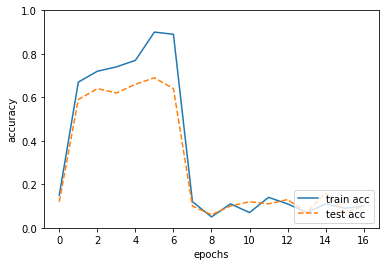

In [111]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import loader2

tf.reset_default_graph()

train_image = './cifar10\\train\\'
train_label = './cifar10\\train_label.csv'
test_image = './cifar10\\test\\'
test_label = './cifar10\\test_label.csv'

x = tf.placeholder(tf.float32, [None, 32, 32, 3])
y = tf.placeholder(tf.float32, [None, 10])
keep_prob = tf.placeholder(tf.float32)

W1 = tf.Variable(tf.random_normal([3, 3, 3, 32], stddev=0.01))
L1 = tf.nn.conv2d(x, W1, strides=[1, 1, 1, 1], padding='SAME')
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01))
L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME')
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

W3 = tf.Variable(tf.random_normal([8 * 8 * 64, 256], stddev=0.01))
L3 = tf.reshape(L2, [-1, 8 * 8 * 64])
L3 = tf.matmul(L3, W3)
L3 = tf.nn.relu(L3)
L3 = tf.nn.dropout(L3, keep_prob)

W4 = tf.Variable(tf.random_normal([256, 10], stddev=0.01))
y2 = tf.matmul(L3,W4) # 내적
y_hat = tf.nn.softmax(y2)

#예측값 출력
y_predict = tf.argmax(y_hat, axis = 1)

# 라벨을 저장하기 위한 변수 생성
y_onehot = tf.placeholder("float",[None,10])
y_label = tf.argmax(y_onehot, axis = 1)

# 정확도를 출력하기 위한 변수 생성
correct_prediction = tf.equal(y_predict, y_label)
acc = tf.reduce_mean(tf.cast(correct_prediction,"float"))

# 교차 엔트로피 오차 함수
loss = -tf.reduce_sum(y_onehot * tf.log(y_hat), axis = 1)

# SGD 경사 감소법
# optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.05)

update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
with tf.control_dependencies(update_ops):
    # Ensures that we execute the update_ops before performing the train_step
    Train = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)


# 변수 초기화
init = tf.global_variables_initializer()

train_acc_list = []
test_acc_list = []

with tf.Session() as sess:

    sess.run(init)
    
    trainX = loader2.image_load(train_image)
    trainY = loader2.label_load(train_label)
    testX = loader2.image_load(test_image)
    testY = loader2.label_load(test_label)
    
    for i in range(0,10000):
        
        # 복원추출
        trainX, trainY = loader2.shuffle_batch(trainX, trainY)
        testX, testY = loader2.shuffle_batch(testX, testY)
        train_xs, train_ys = next_batch(trainX, trainY, 1, 100) # 훈련 데이터
        test_xs, test_ys = next_batch(testX, testY, 1,100) # 테스트 데이터

        sess.run(Train, feed_dict={x : train_xs, y_onehot : train_ys, keep_prob: 0.9})

        if i % 600 == 0:

            train_acc = sess.run(acc, feed_dict={x: train_xs, y_onehot: train_ys, keep_prob: 1.0})
            test_acc = sess.run(acc, feed_dict={x: test_xs, y_onehot: test_ys, keep_prob: 1.0})

            print(i / 600 + 1, 'ecpo train acc:', train_acc, ', test acc:', test_acc)

            train_acc_list.append(train_acc)  # 10000/600 개  16개 # 정확도가 점점 올라감
            test_acc_list.append(test_acc)  # 10000/600 개 16개 # 정확도가 점점 올라감

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show() 